In [2]:
#This section imports the necessary libraries and modules for data manipulation, visualization, and machine learning tasks.
#Libraries include pandas for data handling, matplotlib and seaborn for visualization, and sklearn for machine learning models and metrics.


%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [3]:
#loads the dataset from a CSV file and provides an initial exploration of the data. It displays the data types, shape,
#summary statistics, and detailed information about the dataset.

df = pd.read_csv('framingham.csv',sep=',')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [3]:
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [4]:
df.shape

(4238, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [6]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


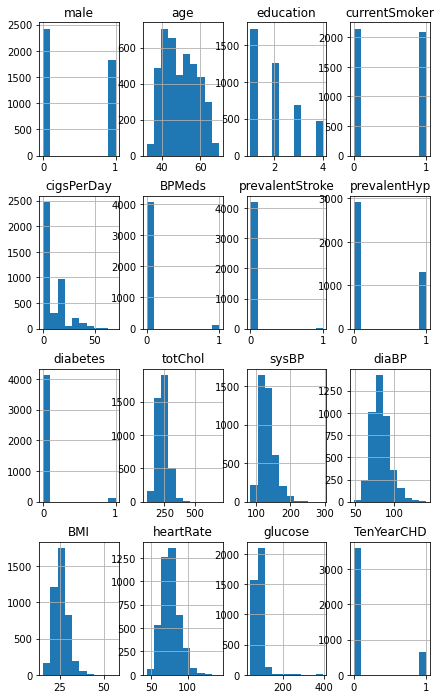

In [7]:
df.hist(figsize=(7,12))
plt.show()

<AxesSubplot: >

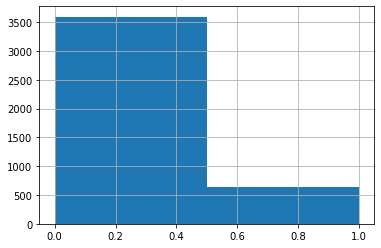

In [8]:
df['TenYearCHD'].hist(bins=2)

In [9]:
df.shape

(4238, 16)

In [4]:
#This section identifies and handles missing values in the dataset by replacing NaNs with the mean value of the respective
#columns and then removing any remaining rows with missing values.

In [10]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [11]:
df.shape

(4238, 16)

In [13]:
df['glucose'] = df['glucose'].replace(np.NaN, df['glucose'].mean())

In [14]:
df['education'] = df['education'].replace(np.NaN, df['education'].mean())

In [15]:
df['BPMeds'] = df['BPMeds'].replace(np.NaN, df['BPMeds'].mean())

In [16]:
df['totChol'] = df['totChol'].replace(np.NaN, df['totChol'].mean())

In [17]:
df['cigsPerDay'] = df['cigsPerDay'].replace(np.NaN, df['cigsPerDay'].mean())

In [18]:
df['BMI'] = df['BMI'].replace(np.NaN, df['BMI'].mean())

In [19]:
df['heartRate'] = df['heartRate'].replace(np.NaN, df['heartRate'].mean())

In [20]:
df.isnull().sum(axis = 0)

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [21]:
df.dropna(inplace=True)
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.00000,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000,0
1,0,46,2.0,0,0.0,0.00000,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000,0
2,1,48,1.0,1,20.0,0.00000,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000,0
3,0,61,3.0,1,30.0,0.00000,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000,1
4,0,46,3.0,1,23.0,0.00000,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.00000,0,1,0,313.0,179.0,92.0,25.97,66.0,86.000000,1
4234,1,51,3.0,1,43.0,0.00000,0,0,0,207.0,126.5,80.0,19.71,65.0,68.000000,0
4235,0,48,2.0,1,20.0,0.02963,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000,0
4236,0,44,1.0,1,15.0,0.00000,0,0,0,210.0,126.5,87.0,19.16,86.0,81.966753,0


In [22]:
df.shape

(4238, 16)

In [ ]:
# calculates the correlation matrix for the dataset and visualizes it using a heatmap to identify relationships between different features.

In [23]:
df.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.028979,0.017126,0.197596,0.316807,-0.052204,-0.004546,0.005313,0.015708,-0.069974,-0.035989,0.057933,0.081506,-0.116601,0.005818,0.088428
age,-0.028979,1.000000,-0.163613,-0.213748,-0.192366,0.121980,0.057655,0.307194,0.101258,0.260270,0.394302,0.206104,0.135283,-0.012819,0.116850,0.225256
education,0.017126,-0.163613,1.000000,0.018301,0.007962,-0.010607,-0.035110,-0.080993,-0.038146,-0.022507,-0.128260,-0.061755,-0.135635,-0.053626,-0.033721,-0.053384
currentSmoker,0.197596,-0.213748,0.018301,1.000000,0.766970,-0.048632,-0.032988,-0.103260,-0.044295,-0.046285,-0.130230,-0.107746,-0.167276,0.062348,-0.054157,0.019456
cigsPerDay,0.316807,-0.192366,0.007962,0.766970,1.000000,-0.045826,-0.032706,-0.065947,-0.037063,-0.026025,-0.088505,-0.056391,-0.092453,0.074851,-0.056088,0.057775
BPMeds,-0.052204,0.121980,-0.010607,-0.048632,-0.045826,1.000000,0.115003,0.259243,0.051571,0.078909,0.252047,0.192490,0.099552,0.015175,0.048905,0.086774
prevalentStroke,-0.004546,0.057655,-0.035110,-0.032988,-0.032706,0.115003,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.024840,-0.017676,0.018055,0.061810
prevalentHyp,0.005313,0.307194,-0.080993,-0.103260,-0.065947,0.259243,0.074830,1.000000,0.077808,0.163041,0.696755,0.615751,0.300572,0.147222,0.082924,0.177603
diabetes,0.015708,0.101258,-0.038146,-0.044295,-0.037063,0.051571,0.006949,0.077808,1.000000,0.040092,0.111283,0.050329,0.086250,0.048993,0.605705,0.097317
totChol,-0.069974,0.260270,-0.022507,-0.046285,-0.026025,0.078909,0.000067,0.163041,0.040092,1.000000,0.207609,0.163903,0.114789,0.090676,0.044583,0.081624


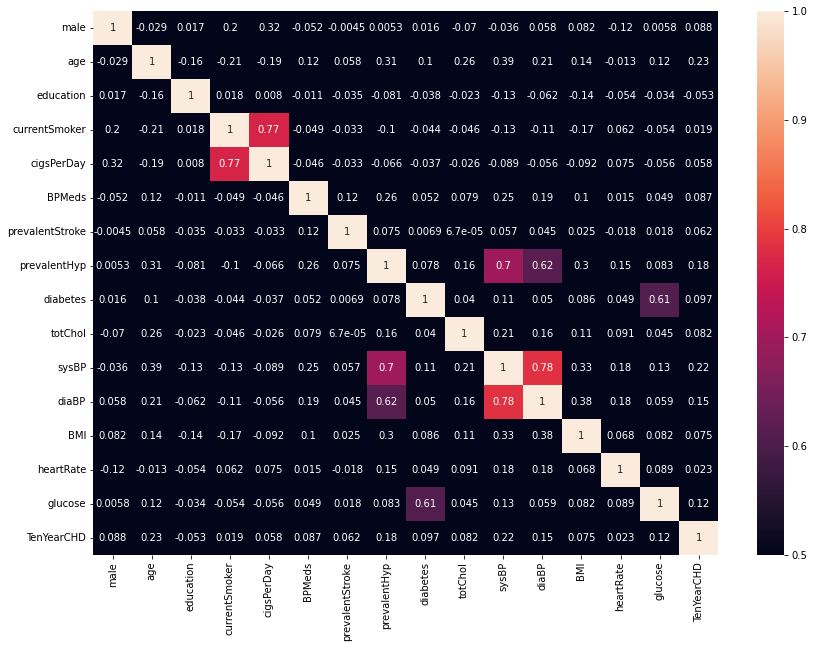

In [24]:
plt.figure(figsize = (14, 10))
sns.heatmap(data = df.corr(), annot = True,vmin=0.5,vmax=1.0)
plt.show()

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]
  
print(vif_data)

            feature         VIF
0              male    2.099164
1               age   41.408914
2         education    4.752988
3     currentSmoker    4.856610
4        cigsPerDay    4.173097
5            BPMeds    1.133746
6   prevalentStroke    1.026828
7      prevalentHyp    2.405420
8          diabetes    1.569327
9           totChol   31.494184
10            sysBP  138.197312
11            diaBP  136.215579
12              BMI   45.140267
13        heartRate   38.845327
14          glucose   21.069910
15       TenYearCHD    1.288489


In [26]:
X = df.drop(columns=['TenYearCHD','BMI','sysBP'])
y = df['TenYearCHD']

In [27]:
counts=y.value_counts()
counts

0    3594
1     644
Name: TenYearCHD, dtype: int64

<AxesSubplot: ylabel='TenYearCHD'>

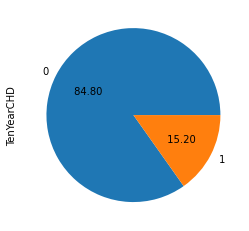

In [28]:
y.value_counts().plot.pie(autopct='% .2f')

In [ ]:
#This section addresses the class imbalance in the target variable by applying under-sampling and over-sampling techniques using the imbalanced-learn library.

In [29]:
!pip install -U imbalanced-learn

In [30]:
from imblearn.under_sampling import RandomUnderSampler

In [31]:
rus=RandomUnderSampler(sampling_strategy='auto')

In [32]:
x_res,y_res=rus.fit_resample(X,y)

Text(0.5, 1.0, 'Under_Sampling')

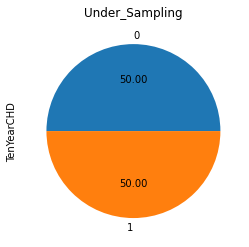

In [33]:
ax=y_res.value_counts().plot.pie(autopct='%.2f')
ax.set_title('Under_Sampling')

In [34]:
y_res.value_counts()

0    644
1    644
Name: TenYearCHD, dtype: int64

In [35]:
from imblearn.over_sampling import RandomOverSampler

In [36]:
ros=RandomOverSampler(sampling_strategy='not majority')

In [37]:
x_ros,y_ros=ros.fit_resample(X,y)

Text(0.5, 1.0, 'Over_Sampling')

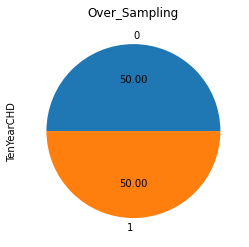

In [38]:
ax=y_ros.value_counts().plot.pie(autopct='%.2f')
ax.set_title('Over_Sampling')

In [39]:
y_ros.value_counts()

0    3594
1    3594
Name: TenYearCHD, dtype: int64

In [40]:
#combine the model

In [41]:
over = RandomOverSampler(sampling_strategy=0.24)

In [47]:
under = RandomUnderSampler(sampling_strategy=0.80)

In [48]:
X_over, y_over = over.fit_resample(X, y)

In [49]:
y_over.value_counts()

0    3594
1     862
Name: TenYearCHD, dtype: int64

Text(0.5, 1.0, 'Over_Sampling')

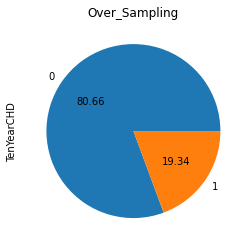

In [50]:
ax=y_over.value_counts().plot.pie(autopct='%.2f')
ax.set_title('Over_Sampling')

In [51]:
X_combined_sampling, y_combined_sampling = under.fit_resample(X_over, y_over)
y_combined_sampling.value_counts()

0    1077
1     862
Name: TenYearCHD, dtype: int64

<AxesSubplot: ylabel='TenYearCHD'>

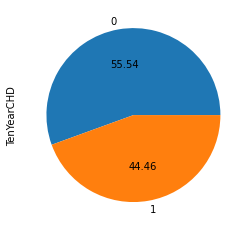

In [52]:
y_combined_sampling.value_counts().plot.pie(autopct='%.2f')

In [ ]:
#calculates the Variance Inflation Factor (VIF) for each feature to detect multicollinearity, helping in feature selection for model training.

In [53]:
vif_data = pd.DataFrame()
vif_data["VIF"] = [variance_inflation_factor(X_over, i)
                          for i in range(len(X_over.columns))]
  
print(vif_data)

          VIF
0    2.061099
1   35.141903
2    4.706685
3    4.849864
4    4.171107
5    1.127937
6    1.026989
7    2.070890
8    1.631171
9   30.756564
10  56.324154
11  37.451419
12  19.309906


In [ ]:
#This section splits the dataset into training and testing sets, trains a logistic regression model, evaluates its
#performance using various metrics (accuracy, F1 score, confusion matrix), and visualizes the results.

In [54]:
X_train,X_test,Y_train,Y_test=train_test_split(X_over.values,y_over,test_size=0.30,random_state=42)

In [55]:
model=LogisticRegression(max_iter=10000)

In [56]:
model.fit(X_train,Y_train)

LogisticRegression(max_iter=10000)

In [57]:
model.score(X_train,Y_train)

0.8188521962167361

In [58]:
model.score(X_test,Y_test)

0.7988032909498878

In [59]:
y_p=model.predict(X_test)

In [60]:
f1_score(Y_test, y_p, average='micro')

0.7988032909498878

In [61]:
c=confusion_matrix(Y_test,y_p, normalize='pred')
c

array([[0.81055901, 0.51020408],
       [0.18944099, 0.48979592]])

<AxesSubplot: >

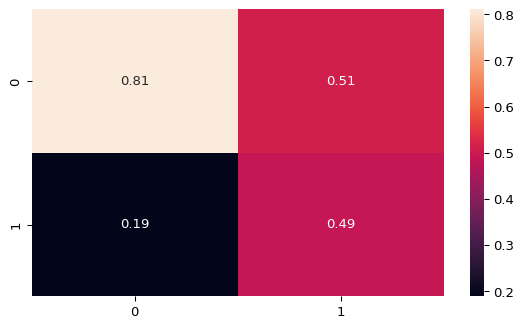

In [62]:
plt.figure(figsize=(7,4), dpi=95)
sns.heatmap(c,annot=True)

In [63]:
print(classification_report(Y_test, y_p))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1069
           1       0.49      0.09      0.15       268

    accuracy                           0.80      1337
   macro avg       0.65      0.53      0.52      1337
weighted avg       0.75      0.80      0.74      1337



In [64]:
#provides examples of how to use the trained model to make predictions on new data samples.

In [65]:
data=np.array([0,61,3.0,1,30.0,00.0,0,1,0,225.0,150.0,65.0,103.0])
result=model.predict(data.reshape(1,-1))
result

array([1], dtype=int64)

In [66]:
data=np.array([1,39,4.0,0,00.0,00.0,0,0,0,195.0,106.0,80.0,77.0])
result=model.predict(data.reshape(1,-1))
result

array([0], dtype=int64)

In [386]:
df = pd.read_csv('framingham.csv',sep=',')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
